In [1]:
#Bibliotecas
import h5py
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib
import pickle
#import hdbscan
from scipy.signal import butter, sosfiltfilt, find_peaks

#from utiles import spike_reducer

In [2]:
def SpikeDetector(time_series, alpha, th_method = 1, distance=1):
    th = 0
    if th_method == 1:
        ## Standard deviation calculus
        th = alpha * np.std(time_series)
    elif th_method == 2:
        abs_time_series = np.abs(time_series)/0.6745
        th = 4 * np.median(abs_time_series)
    else:
        print("Ingresa una opción válida")
    if th != 0:  
        peaks, _ = find_peaks(-1*time_series, height = th, distance=1)
        
        trimmed_peaks_matrix = np.zeros((peaks.shape[0], 31))
        delete_elec = []
        for i in range(len(peaks)):
            cut = time_series[peaks[i]-10: peaks[i]+21]
            try:
                trimmed_peaks_matrix[i] = cut
            except ValueError:# esta al final o inicio y no tiene 31 valores 
                print("Value Error: {}".format(peaks[i]))
                delete_elec.append(i)
        
        for elec in delete_elec:
            np.delete(peaks, elec)
        
        print("Se obtuvieron {} spikes.".format(len(peaks)))

        return trimmed_peaks_matrix, peaks, th;

In [3]:
mea_elec = {
    'F7'  : 1,  'F6'  : 31, 'G6'  : 61, 'G7'  : 91,
    'F8'  : 2,  'E6'  : 32, 'G5'  : 62, 'H7'  : 92,
    'F12' : 3,  'A6'  : 33, 'G1'  : 63, 'M7'  : 93,
    'F11' : 4,  'B6'  : 34, 'G2'  : 64, 'L7'  : 94,
    'F10' : 5,  'C6'  : 35, 'G3'  : 65, 'K7'  : 95,
    'F9'  : 6,  'D6'  : 36, 'G4'  : 66, 'J7'  : 96,
    'E12' : 7,  'A5'  : 37, 'H1'  : 67, 'M8'  : 97,
    'E11' : 8,  'B5'  : 38, 'H2'  : 68, 'L8'  : 98,
    'E10' : 9,  'C5'  : 39, 'H3'  : 69, 'K8'  : 99,
    'E9'  : 10, 'D5'  : 40, 'H4'  : 70, 'J8'  : 100,
    'D12' : 11, 'A4'  : 41, 'J1'  : 71, 'M9'  : 101,
    'D11' : 12, 'B4'  : 42, 'J2'  : 72, 'L9'  : 102,
    'D10' : 13, 'C4'  : 43, 'J3'  : 73, 'K9'  : 103,
    'D9'  : 14, 'D4'  : 44, 'J4'  : 74, 'J9'  : 104,
    'C11' : 15, 'B3'  : 45, 'K2'  : 75, 'L10' : 105,
    'C10' : 16, 'C3'  : 46, 'K3'  : 76, 'K10' : 106,
    'B10' : 17, 'C2'  : 47, 'L3'  : 77, 'K11' : 107,
    'E8'  : 18, 'E5'  : 48, 'H5'  : 78, 'H8'  : 108,
    'C9'  : 19, 'D3'  : 49, 'K4'  : 79, 'J10' : 109,
    'B9'  : 20, 'D2'  : 50, 'L4'  : 80, 'J11' : 110,
    'A9'  : 21, 'D1'  : 51, 'M4'  : 81, 'J12' : 111,
    'D8'  : 22, 'E4'  : 52, 'J5'  : 82, 'H9'  : 112,
    'C8'  : 23, 'E3'  : 53, 'K5'  : 83, 'H10' : 113,
    'B8'  : 24, 'E2'  : 54, 'L5'  : 84, 'H11' : 114,
    'A8'  : 25, 'E1'  : 55, 'M5'  : 85, 'H12' : 115,
    'D7'  : 26, 'F4'  : 56, 'J6'  : 86, 'G9'  : 116,
    'C7'  : 27, 'F3'  : 57, 'K6'  : 87, 'G10' : 117,
    'B7'  : 28, 'F2'  : 58, 'L6'  : 88, 'G11' : 118,
    'A7'  : 29, 'F1'  : 59, 'M6'  : 89, 'G12' : 119,
    'E7'  : 30, 'F5'  : 60, 'H6'  : 90, 'G8'  : 120,
}


In [4]:
mea_elec.keys()

dict_keys(['F7', 'F6', 'G6', 'G7', 'F8', 'E6', 'G5', 'H7', 'F12', 'A6', 'G1', 'M7', 'F11', 'B6', 'G2', 'L7', 'F10', 'C6', 'G3', 'K7', 'F9', 'D6', 'G4', 'J7', 'E12', 'A5', 'H1', 'M8', 'E11', 'B5', 'H2', 'L8', 'E10', 'C5', 'H3', 'K8', 'E9', 'D5', 'H4', 'J8', 'D12', 'A4', 'J1', 'M9', 'D11', 'B4', 'J2', 'L9', 'D10', 'C4', 'J3', 'K9', 'D9', 'D4', 'J4', 'J9', 'C11', 'B3', 'K2', 'L10', 'C10', 'C3', 'K3', 'K10', 'B10', 'C2', 'L3', 'K11', 'E8', 'E5', 'H5', 'H8', 'C9', 'D3', 'K4', 'J10', 'B9', 'D2', 'L4', 'J11', 'A9', 'D1', 'M4', 'J12', 'D8', 'E4', 'J5', 'H9', 'C8', 'E3', 'K5', 'H10', 'B8', 'E2', 'L5', 'H11', 'A8', 'E1', 'M5', 'H12', 'D7', 'F4', 'J6', 'G9', 'C7', 'F3', 'K6', 'G10', 'B7', 'F2', 'L6', 'G11', 'A7', 'F1', 'M6', 'G12', 'E7', 'F5', 'H6', 'G8'])

In [5]:
# C H A R G E   F I L E
path_file = "E:\\MEA_data\\20230622\\datamanager\\Rebanada02\\OPTOa20230622s02_RAW.h5"
#file['Data']['Recording_0']['AnalogStream']['Stream_0']['ChannelData']
#file['Data']['Recording_0']['AnalogStream']['Stream_0']['ChannelDataTimeStamps']
#file['Data']['Recording_0']['AnalogStream']['Stream_0']['InfoChannel']
file = h5py.File(path_file)

index_elec = {}
info_channel = file['Data']['Recording_0']['AnalogStream']['Stream_0']['InfoChannel']
name_channel = ''
for i in range(0, len(info_channel)):
    name_channel = info_channel[i][4].decode('UTF-8')
    index_elec[name_channel] = i

In [6]:
index_elec

{'F7': 0,
 'F8': 1,
 'F12': 2,
 'F11': 3,
 'F10': 4,
 'F9': 5,
 'E12': 6,
 'E11': 7,
 'E10': 8,
 'E9': 9,
 'D12': 10,
 'D11': 11,
 'D10': 12,
 'D9': 13,
 'C11': 14,
 'C10': 15,
 'B10': 16,
 'E8': 17,
 'C9': 18,
 'B9': 19,
 'A9': 20,
 'D8': 21,
 'C8': 22,
 'B8': 23,
 'A8': 24,
 'D7': 25,
 'C7': 26,
 'B7': 27,
 'A7': 28,
 'E7': 29,
 'F6': 30,
 'E6': 31,
 'A6': 32,
 'B6': 33,
 'C6': 34,
 'D6': 35,
 'A5': 36,
 'B5': 37,
 'C5': 38,
 'D5': 39,
 'A4': 40,
 'B4': 41,
 'C4': 42,
 'D4': 43,
 'B3': 44,
 'C3': 45,
 'C2': 46,
 'E5': 47,
 'D3': 48,
 'D2': 49,
 'D1': 50,
 'E4': 51,
 'E3': 52,
 'E2': 53,
 'E1': 54,
 'F4': 55,
 'F3': 56,
 'F2': 57,
 'F1': 58,
 'F5': 59,
 'G6': 60,
 'G5': 61,
 'G1': 62,
 'G2': 63,
 'G3': 64,
 'G4': 65,
 'H1': 66,
 'H2': 67,
 'H3': 68,
 'H4': 69,
 'J1': 70,
 'J2': 71,
 'J3': 72,
 'J4': 73,
 'K2': 74,
 'K3': 75,
 'L3': 76,
 'H5': 77,
 'K4': 78,
 'L4': 79,
 'M4': 80,
 'J5': 81,
 'K5': 82,
 'L5': 83,
 'M5': 84,
 'J6': 85,
 'K6': 86,
 'L6': 87,
 'M6': 88,
 'H6': 89,
 'G7': 9

In [9]:
'''  'C4', 'C5', 'C6', 'C7', 'D5', 'E6', 'E9', 'L6', 'L8'  '''

#electrode selection
#list_elec = ['C5', 'L6']
# all electrodes
list_elec = list(index_elec.keys())
#print(list_elec)



dict_elec = {}
for electrode in list_elec:
    print("{} e:{}".format(electrode, mea_elec[electrode]))
    raw_signal = np.array(file['Data']['Recording_0']['AnalogStream']['Stream_0']['ChannelData'][index_elec[electrode]])

    ## Filtering the raw signal
    sos = butter(4, [400, 3500], 'bp', output='sos', fs = 10000)
    time_series = sosfiltfilt(sos, raw_signal)

    segments, peaks, std_th = SpikeDetector(time_series, alpha= 5, th_method = 2, distance=1)
    #segments, peaks, std_th = SpikeDetector(raw_signal, alpha= 5, th_method = 2, distance=1)
    dict_elec[electrode]={'segments' : segments, 
                          'ts':peaks, 
                          'clusters' : np.zeros(segments.shape[0]),
                          'umap' : np.zeros(segments.shape[0])}

F7 e:1
Se obtuvieron 531 spikes.
F8 e:2
Se obtuvieron 3487 spikes.
F12 e:3
Se obtuvieron 219 spikes.
F11 e:4
Se obtuvieron 381 spikes.
F10 e:5
Se obtuvieron 561 spikes.
F9 e:6
Se obtuvieron 537 spikes.
E12 e:7
Se obtuvieron 388 spikes.
E11 e:8
Se obtuvieron 630 spikes.
E10 e:9
Se obtuvieron 775 spikes.
E9 e:10
Se obtuvieron 921 spikes.
D12 e:11
Se obtuvieron 340 spikes.
D11 e:12
Se obtuvieron 375 spikes.
D10 e:13
Se obtuvieron 472 spikes.
D9 e:14
Se obtuvieron 423 spikes.
C11 e:15
Se obtuvieron 250 spikes.
C10 e:16
Se obtuvieron 224 spikes.
B10 e:17
Se obtuvieron 458 spikes.
E8 e:18
Se obtuvieron 629 spikes.
C9 e:19
Se obtuvieron 772 spikes.
B9 e:20
Se obtuvieron 922 spikes.
A9 e:21
Se obtuvieron 402 spikes.
D8 e:22
Se obtuvieron 421 spikes.
C8 e:23
Se obtuvieron 511 spikes.
B8 e:24
Se obtuvieron 750 spikes.
A8 e:25
Se obtuvieron 408 spikes.
D7 e:26
Se obtuvieron 2474 spikes.
C7 e:27
Se obtuvieron 3395 spikes.
B7 e:28
Se obtuvieron 704 spikes.
A7 e:29
Se obtuvieron 807 spikes.
E7 e:30


In [8]:
segments.shape[0]

531

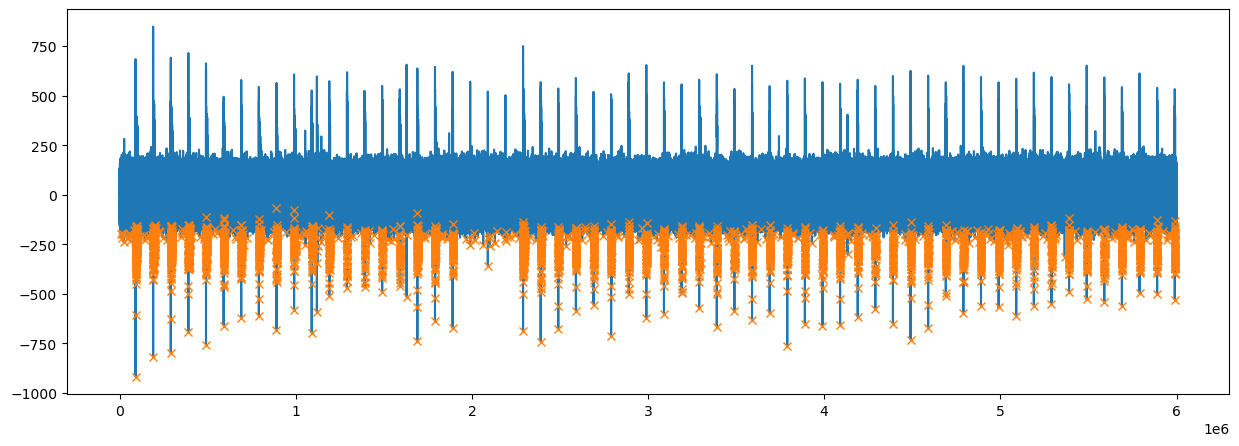

In [14]:
e = 'L6'


signal = np.array(file['Data']['Recording_0']['AnalogStream']['Stream_0']['ChannelData'][index_elec[e]])
plt.figure(figsize =(15, 5))
plt.plot(signal)
plt.plot(dict_elec[e]['ts'], signal[dict_elec[e]['ts']], "x")
plt.plot(np.zeros_like(std_th), "--", color="gray")

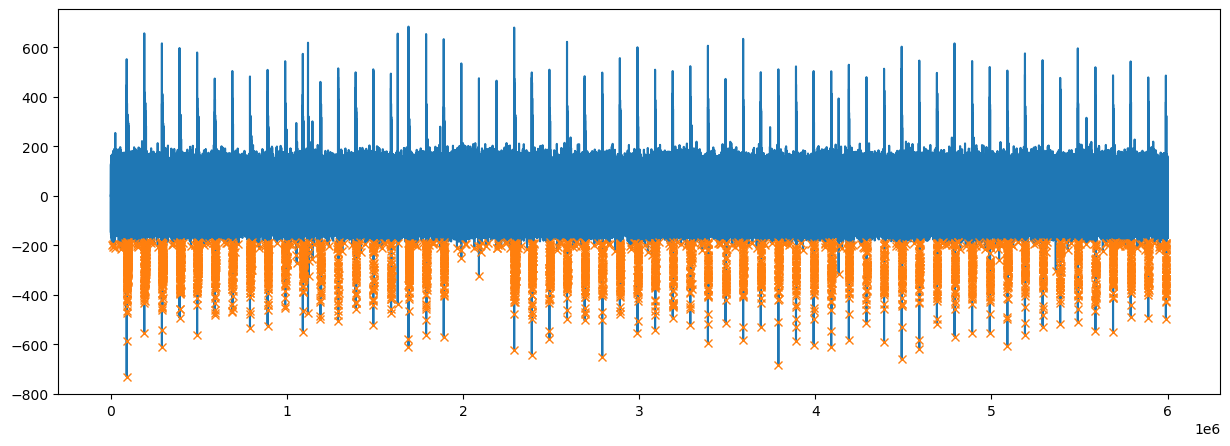

In [13]:
plt.figure(figsize =(15, 5))
plt.plot(time_series)
plt.plot(peaks, time_series[peaks], "x")
plt.plot(np.zeros_like(std_th), "--", color="gray")

In [13]:
index_elec[e]

87

In [15]:
# Escritura en modo binario, vacía el fichero si existe
#name_pckl = './files/CTR20211101s01A_SPK.pckl'
name_pckl = "E:\\MEA_data\\20230622\\datamanager\\Rebanada02\\OPTOa_SPK.pckl"

pckl_file = open(name_pckl,'wb')
# Escribe la colección en el fichero 
pickle.dump(dict_elec, pckl_file) 
pckl_file.close()